<a href="https://colab.research.google.com/github/jpgill86/python-for-neuroscientists/blob/master/02.5-The-Core-Language-of-Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Core Language of Python: Part 5

## Reading and Writing Files

The built-in function `open()` can be used for reading and writing files. Let's try writing a bit of text to a new file called `my_file.txt`. The `open()` function must be called with the file name, as well as a "mode" parameter, `'w'`, which indicates the file will be written to. `open()` returns an object representing the file, which we will store in a variable named `f`. This object has a `write()` method we can use to add text to the file. Finally, we must call the `close()` method to ensure the file is saved properly.

In [1]:
f = open('my_file.txt', 'w')
f.write('here is some text')
f.close()

On the left edge of your browser window, you can access Colab's "Files" tab, which should now contain the new file `my_file.txt` (new files may sometimes take a few moments to appear in the list):

> 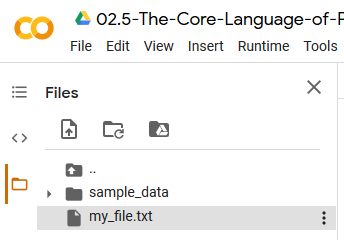

You can now double-click the file to open it in another tab and confirm that it contains the written text.

We can also read the file programmatically using `open()` with the `'r'` mode parameter, along with the `read()` method. Although we are not writing to the file this time, we still need to call `close()` to ensure the file is released properly from Python's clutches:

In [2]:
f = open('my_file.txt', 'r')
print(f.read())
f.close()

here is some text


A recommended alternative for doing the same thing involves using the **`with` and `as` keywords** to work within what is called a **context manager**. Context managers can have many uses. In the case of accessing files with `open()`, the advantage of using the context manager is that it will automatically call the `close()` method when everything inside the `with` block is finished. This approach is recommended because of this automatic "clean-up", which should occur even if there is an error during the reading. The following code is equivalent to the previous:

In [3]:
with open('my_file.txt', 'r') as f:
    print(f.read())

here is some text


> **Important:** Files on a Colab server, like `my_file.txt`, are destroyed when either *Runtime > Factory reset runtime* is executed from the Colab menu, or when the session has expired (usually after some hours of inactivity). Don't put important files on the Colab server and expect them to be there forever! You can download a file to save on your own computer using the Files tab on the left edge of the window.

## Importing Code

Python code can be stored within text files with the file extension `.py` instead of `.txt`. These code files are called **modules**.

Let's create a string containing a bit of Python code that defines a simple variable and function:

In [4]:
some_code = '''\
my_string = 'Aplysia californica'

def count_to(n):
    for i in range(1, n+1):
        print(i)
'''

Note that since this is just a string, `my_list` and `my_func` have not actually been defined in your session (yet).

Next, let's write that string to a Python module, with the file name `my_module.py`:

In [5]:
with open('my_module.py', 'w') as f:
    f.write(some_code)

View the file from the Colab Files tab to confirm it contains the string (again, the new file may take a few moments to appear in the file list).

Like in the previous example, we can read the file and print its contents using the normal approach for text files:

In [6]:
with open('my_module.py', 'r') as f:
    print(f.read())

my_string = 'Aplysia californica'

def count_to(n):
    for i in range(1, n+1):
        print(i)



Again, this is just text in the form of a string.

To actually use the code within a module, we must **import** it using the `import` command with the name of the module, without the `.py` at the end:

In [7]:
import my_module

Running `import my_module` causes the code within `my_module.py` to be executed. Every variable, function, and class within the module was placed under a common **namespace** matching the module name and assessible using dot (`.`) notation:

In [8]:
my_module.my_string

'Aplysia californica'

In [9]:
my_module.count_to(4)

1
2
3
4


Using the syntax `import ... as ...`, it is possible to choose a different namespace name:

In [10]:
import my_module as another_name

another_name.my_string

'Aplysia californica'

It is also possible to import specific contents of the module directly into the global namespace:

In [11]:
from my_module import my_string

my_string

'Aplysia californica'

You would not typically create a module by programmatically writing a string like `some_code` to a `.py` file; that was done here just as a demonstration. Normally, modules are created and modified in an external text editor like any other text file. This works well if you are running Python locally on your computer, but less so for Colab running remotely in a browser.

If changes are made to a module after it has been imported once already in your session, you cannot just use `import` again to import the module's updated definitions. Python will ignore import commands for modules it has already imported. This prevents circular imports (yes, modules can import other modules!) and improves performance, but it is a little annoying when you are actively developing code in a module. You have to restart your session (from the Colab menu choose *Runtime > Restart runtime*), which will delete all variables in memory, before you can import the modified module.

## The Standard Library

Every Python installation includes a large set of available modules, referred to collectively as **the standard library**, which implements many important functions and classes. A complete listing of the standard library modules can be found in the official documentation: [The Standard Library](https://docs.python.org/3/library/index.html). We will not survey the many useful features here, so you are encouraged to take a look yourself. Instead, what follows is just a small sampling of what the standard library offers:

In [12]:
import math

# the math module defines common mathematical functions and constants
math.cos(math.pi/4) == math.sqrt(2)/2

True

In [13]:
import statistics

# the statistics module defines many common statistical functions, such as
# stdev() for computing the sample standard deviation
statistics.stdev([1, 3, 5, 10])

3.8622100754188224

In [14]:
import random

# the random module defines a randint() function for generating a random
# integer within a given range
random.randint(1, 100)

37

In [15]:
import itertools

# the itertools module defines a permutations() function which is used here to
# obtain all possible orderings of items in a sequence
[''.join(p) for p in itertools.permutations('ABC')]

['ABC', 'ACB', 'BAC', 'BCA', 'CAB', 'CBA']

In [16]:
import datetime

# the datetime module defines a class that is (somewhat confusingly) also named
# datetime. here we call a class method called now() which returns an instance
# of the datetime class for the current date and time
datetime.datetime.now()

datetime.datetime(2020, 9, 26, 2, 36, 55, 898600)

In [17]:
import sys

# the sys module defines a string called version which contains info about the
# version of Python in use
print(sys.version)

3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [18]:
import os

# the os module defines a getcwd() function which returns the path of the
# current working directory (cwd), which is the default folder where files will
# be written to, and where Python looks first for reading files. the function
# os.chdir() can be used to change the current working directory.
os.getcwd()

'/content'

## Third-Party Packages

**Packages** are installable modules, or installable collections of modules, which are packaged for easy distribution to other computers. There is an official website, called **PyPI** (Python Package Index), where packages can be located: https://pypi.org. Anybody ([literally anybody!](https://pypi.org/project/neurotic/)) is allowed to submit packages to PyPI where they are hosted on PyPI's servers for all to access.

Although it is possible to use a browser to manually download packages from PyPI, this is not recommended. Instead, to install packages you can use an official command line tool: **`pip`** (Pip Installs Packages). `pip` will not only download a package for you and put the files in the correct place, but it will also automatically and recursively install other packages that the desired package depends on. `pip` can also be used to upgrade installed packages to newer versions or uninstall them, or to list all installed packages.

`pip` is a command line tool, not a Python command. So, normally you would run `pip` from a command prompt or terminal. In Colab (or any Jupyter notebook), commands can be passed to the command line but beginning the command with an exclamation point (`!`). For instance, the command `pip list` will list all installed packages, and we can run this command within a notebook using `! pip list`:

In [19]:
! pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
argon2-cffi                   20.1.0         
asgiref                       3.2.10         
astor                         0.8.1          
astropy                       4.0.1.post1    
astunparse                    1.6.3          
async-generator               1.10           
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.2.0         
audioread                     2.1.8          
autograd                      1.3            
Babel                         2.8.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.2.0          
blis                          0.4.

Woah, that's a long list! A minimal Python installation would have far fewer packages installed initially, but Colab comes preloaded with many popular packages used for scientific computing.

One very important package which will be the focus of the next chapter is called [NumPy](https://numpy.org) (Numeric Python) and is already installed. We can learn a little more about the version we have installed using `pip show`:

In [20]:
! pip show numpy

Name: numpy
Version: 1.18.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, umap-learn, torchvision, torchtext, torch, tifffile, thinc, Theano, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, resampy, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyemd, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, np-utils, nibabel, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lucid, lightgbm, librosa, knnimpute, Keras, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-fin

To see how easy installing packages is, let's install the [Quantities](https://python-quantities.readthedocs.io) package, which implements physical units and constants:

In [21]:
! pip install quantities

     |████████████████████████████████| 92kB 2.5MB/s 
  Created wheel for quantities: filename=quantities-0.12.4-cp36-none-any.whl size=79168 sha256=1e184458625ec46854d975770349a3a19504549c740b77d0c5992cd8f7029727
  Stored in directory: /root/.cache/pip/wheels/2c/27/a5/62fb2a57d167d7b7164278de7399ba1504321c1d6c3a3802d5
Successfully built quantities


Now it can be used like any other module:

In [22]:
import quantities

# the quantities package implements a class called Quantity which is an array
# of numbers with an associated unit (e.g., microvolts). the class has a method
# called rescale() which can convert the units (e.g., to millivolts).
quantities.Quantity([1, 2, 3], 'uV').rescale('mV')

array([0.001, 0.002, 0.003]) * mV

If ever you install packages in a Colab environment but then want to revert to the original state (effectively uninstalling all the packages you added or upgraded), you can use the menu action *Runtime > Factory reset runtime*.

# Continue to the Next Lesson

Return to home to continue to the next lession:

https://jpgill86.github.io/python-for-neuroscientists/

# External Resources

The official language documentation:

* [Python 3 documentation](https://docs.python.org/3/index.html)
* [Built-in functions](https://docs.python.org/3/library/functions.html)
* [Standard libraries](https://docs.python.org/3/library/index.html)
* [Glossary of terms](https://docs.python.org/3/glossary.html)
* [In-depth tutorial](https://docs.python.org/3/tutorial/index.html)

Extended language documentation:
* [IPython (Jupyter) vs. Python differences](https://ipython.readthedocs.io/en/stable/interactive/python-ipython-diff.html)
* [IPython (Jupyter) "magic" (`%`) commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

Free interactive books created by Jake VanderPlas:

* [A Whirlwind Tour of Python](https://colab.research.google.com/github/jakevdp/WhirlwindTourOfPython/blob/master/Index.ipynb) [[PDF version]](https://www.oreilly.com/programming/free/files/a-whirlwind-tour-of-python.pdf)
* [Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)

# License

[This work](https://github.com/jpgill86/python-for-neuroscientists) is licensed under a [Creative Commons Attribution 4.0 International
License](http://creativecommons.org/licenses/by/4.0/).